![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

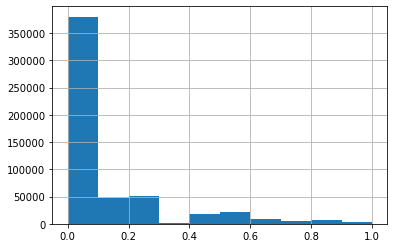

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [8]:
# Celda 1
# Train
vect_A = CountVectorizer()
X_train_dtm_A = vect_A.fit_transform(X_train)
#temp_A_train=X_train_dtm_A.todense()
# test
X_test_dtm_A = vect_A.transform(X_test)
#temp_A_test=X_test_dtm_A.todense()

# Creación del modelo
modelo = RandomForestRegressor()
# Ajuste de parametros
param_grid = {'n_jobs':[-1], 
              'n_estimators':[250], 
              'min_samples_split':[4], 
              'max_features':[3], 
              'max_depth':[2], 
              'random_state':[0]
             }
# Creación del GridSearchCV 
grid_search = GridSearchCV(modelo, param_grid, scoring='neg_mean_squared_error', cv=5)
# Formulacion de modelo 
grid_search.fit(X_train_dtm_A, y_train)
# Formulando los parámetros con mejor desempeño
best_model = grid_search.best_estimator_

# Predicciones
P_RF_A = best_model.predict(X_test_dtm_A)

#Verificamos el desempeño del modelo
mae_rfA = metrics.mean_absolute_error(y_test, P_RF_A)
rmse_rfA = metrics.mean_squared_error(y_test, P_RF_A, squared=False)
mse_rfA = metrics.mean_squared_error(y_test, P_RF_A)

print("Mean Absolute Error:", mae_rfA)
print("Root Mean Squared Error:", rmse_rfA)
print("Mean Squared Error:", mse_rfA)

Mean Absolute Error: 0.14477847403542643
Root Mean Squared Error: 0.1975382561196933
Mean Squared Error: 0.039021362630809554


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
# Celda 2
# Train
vect_B = CountVectorizer(lowercase=False, ngram_range=(3, 3))
X_train_dtm_B = vect_B.fit_transform(X_train)
#temp_A_train=X_train_dtm_A.todense()
# test
X_test_dtm_B = vect_B.transform(X_test)
#temp_A_test=X_test_dtm_A.todense()

# Creación del modelo
modelo = RandomForestRegressor()
# Ajuste de parametros
param_grid = {'n_jobs':[-1], 
              'n_estimators':[250], 
              'min_samples_split':[4], 
              'max_features':[3], 
              'max_depth':[2], 
              'random_state':[0]
             }
# Creación del GridSearchCV 
grid_search = GridSearchCV(modelo, param_grid, scoring='neg_mean_squared_error', cv=5)
# Formulacion de modelo 
grid_search.fit(X_train_dtm_B, y_train)
# Formulando los parámetros con mejor desempeño
best_model = grid_search.best_estimator_

# Predicciones
P_RF_B = best_model.predict(X_test_dtm_B)

#Verificamos el desempeño del modelo
mae_rfB = metrics.mean_absolute_error(y_test, P_RF_B)
rmse_rfB = metrics.mean_squared_error(y_test, P_RF_B, squared=False)
mse_rfB = metrics.mean_squared_error(y_test, P_RF_B)

print("Mean Absolute Error:", mae_rfB)
print("Root Mean Squared Error:", rmse_rfB)
print("Mean Squared Error:", mse_rfB)

Mean Absolute Error: 0.14479364123554175
Root Mean Squared Error: 0.19756917758369624
Mean Squared Error: 0.0390335799310981


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

**Respuesta**

TfidfVectorizer es usado para identificar patrones y/o relaciones dentro de los datos de texto, haciéndola una técnica utilizada para recolección de información, sentiment analysis, clasificación de texto, etc.
Nos permite identificar las frases o palabras más relevantes en un texto. 

Al contar la frecuencia de cada palabra en cada documento(TF), multiplica ese resultado por el IDF( frecuencia inversa del documento). Esto produce un score que da a conocer la importancia de cada palabra en cada registro de todo el dataset. El resutado de TfidfVectorizer es una matriz donde la primera fila corresponde a las palabras únicas en el dataset y las siguientes filas representan el score de cada palabra en cada registro del dataset.

A comparación de CountVectorizer, TfidfVectorizer es un método más sofisticado que considera la frecuencia de la palabra(TF) y el IDF y les asigna un score normalizado. Por otro lado, CountVectorizer es una técnica que se basa en el conteo de palabras por registro.

Las ventajas de esta técnica es que captura la importancia de las palabras no solo por frecuencia en cada registro, sino todo el dataset. Adicionalmente, al tener como resultado un score numérico estandarizado permite una fácil implementación a modelos de machine learning. TfidfVectorizer tiene también un buen desempeño sentiment analysis ya que logra asignar un peso más alto a palabras menos comunes que tienen un fuerte sentimiento, en lugar de solo palabras que se repiten con frecuencia, mejorando de esta manera la precisión de los modelos.


En comparación al buen desempeño que CountVectorizer tiene en textos cortos, TfidfVectorizer requerirá una calibración de parámetros más profunda. Asimismo, a pesar de su buen desempeño para procesar grandes cantidades de texto, TfidfVectorizer requerirá de un costo computacional más alto.


#### CountVectorizer
Las ventajas de esta técnica son su facilidad de implementación, la interpretabilidad de sus resultados (conteo de palabra) y su bajo costo computacional a la hora de procesar grandes cantidades de texto. 

Sin embargo, CountVectorizer puede causar ruido en el modelo ya que al centrarse en el conteo de las palabras, es sensible a las "stop words" como "la", "a", "the" . Asimismo, no logrará capturar completamente la importancia de las palabras ni semántica del texto debido a que se enfoca en la frecuencia de palabras por registro.

*Referencias:*

https://www.analyticsvidhya.com/blog/2021/07/bag-of-words-vs-tfidf-vectorization-a-hands-on-tutorial/

https://enjoymachinelearning.com/blog/countvectorizer-vs-tfidfvectorizer/

https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

https://medium.com/artificial-coder/count-vectorizers-vs-tfidf-vectorizers-natural-language-processing-b5371f51a40c

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [10]:
# Celda 4
# Train
vectorizer_C = TfidfVectorizer(lowercase=False, ngram_range=(3, 3))
X_train_dtm_C = vectorizer_C.fit_transform(X_train)
#temp_A_train=X_train_dtm_A.todense()
# test
X_test_dtm_C = vectorizer_C.transform(X_test)
#temp_A_test=X_test_dtm_A.todense()

# Creación del modelo
modelo = RandomForestRegressor()
# Ajuste de parametros
param_grid = {'n_jobs':[-1], 
              'n_estimators':[250], 
              'min_samples_split':[4], 
              'max_features':[3], 
              'max_depth':[2], 
              'random_state':[0]
             }
# Creación del GridSearchCV 
grid_search = GridSearchCV(modelo, param_grid, scoring='neg_mean_squared_error', cv=5)
# Formulacion de modelo 
grid_search.fit(X_train_dtm_C, y_train)
# Formulando los parámetros con mejor desempeño
best_model = grid_search.best_estimator_

# Predicciones
P_RF_C = best_model.predict(X_test_dtm_C)

#Verificamos el desempeño del modelo
mae_rfC = metrics.mean_absolute_error(y_test, P_RF_C)
rmse_rfC = metrics.mean_squared_error(y_test, P_RF_C, squared=False)
mse_rfC = metrics.mean_squared_error(y_test, P_RF_C)

print("Mean Absolute Error:", mae_rfC)
print("Root Mean Squared Error:", rmse_rfC)
print("Mean Squared Error:", mse_rfC)

Mean Absolute Error: 0.14479361915917885
Root Mean Squared Error: 0.19756916778782174
Mean Squared Error: 0.03903357606037246


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

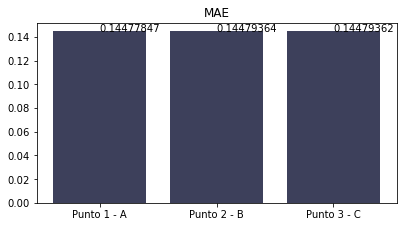

In [11]:
# Celda 5

# MAE
fig = plt.figure(figsize = (5,2.5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("MAE")
ejeX = ['Punto 1 - A', 'Punto 2 - B', 'Punto 3 - C']
ejeY = [round(mae_rfA, 8), round(mae_rfB, 8), round(mae_rfC, 8)]
ax.bar(ejeX, ejeY, color = '#3d405b')
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show();

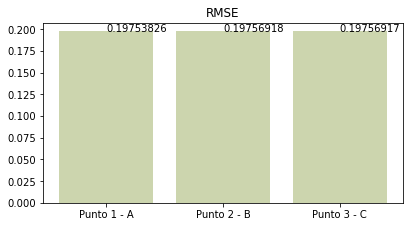

In [12]:
# RMSE
fig = plt.figure(figsize = (5,2.5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("RMSE")
ejeX = ['Punto 1 - A', 'Punto 2 - B', 'Punto 3 - C']
ejeY = [round(rmse_rfA, 8), round(rmse_rfB, 8), round(rmse_rfC, 8)]
ax.bar(ejeX, ejeY, color = '#ccd5ae')
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show();

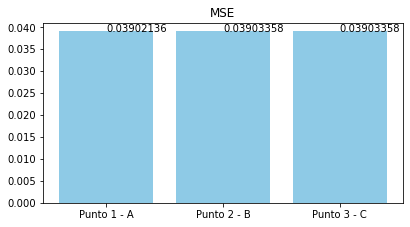

In [13]:
# MSE
fig = plt.figure(figsize = (5,2.5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("MSE")
ejeX = ['Punto 1 - A', 'Punto 2 - B', 'Punto 3 - C']
ejeY = [round(mse_rfA, 8), round(mse_rfB, 8), round(mse_rfC, 8)]
ax.bar(ejeX, ejeY, color = '#8ecae6')
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show();

En el caso del ejercicio encontramos que, al emplear un randomforest regressor, realmente no habían diferencias significativas en el desempeño de los diferentes modelos. 

Inicialmente se esperaría que por ejemplo un modelo con TfidfVectorizer presentara mejores resultados, pero a pesar de sus ventajas teóricas no logró superar a los demás. 

Este comportamiento se podría explicar por el ajuste inicial de parámetros y el crossvalidation realizado en todos los modelos ejecutados. Se recomienda emplear otros tipos de regresores y validaciones para seguir explorando las diferencias entre los diferentes tipos de tokenización. 